# NAME : PADIGI REDDY SANGEETHA
# ROLL NO : RA2011026040035
                               


## PROBLEM STATEMENT
        A certain premium club boasts a large customer membership. The members pay an annual membership fee in return for using the exclusive facilities offered by this club. The fees are customized for every member's personal package.In the last few years, however, the club has been facing an issue with a lot of members cancelling their memberships.The club management plans to address this issue by proactively addressing customer grievances. They, however, do not have enough bandwidth to reach out to the entire customer base individually and are looking to see whether a statistical approach can help them identify customers who are likely to cancel their membership status. Can you help them ? Relevant data is provided in the worksheet titled "Data".

## Importing  Necessary Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings 
warnings.filterwarnings('ignore') 

## Importing The Dataset

In [2]:
df = pd.read_csv('Videos\Captures\ZF\Data.csv')

## Data Overview

In [3]:
df.info() # data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10362 entries, 0 to 10361
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MEMBERSHIP_NUMBER      10362 non-null  object 
 1   MEMBERSHIP_TERM_YEARS  10362 non-null  int64  
 2   ANNUAL_FEES            10362 non-null  float64
 3   MEMBER_MARITAL_STATUS  7765 non-null   object 
 4   MEMBER_GENDER          9751 non-null   object 
 5   MEMBER_ANNUAL_INCOME   8608 non-null   float64
 6   MEMBER_OCCUPATION_CD   10319 non-null  float64
 7   MEMBERSHIP_PACKAGE     10362 non-null  object 
 8   MEMBER_AGE_AT_ISSUE    10362 non-null  int64  
 9   ADDITIONAL_MEMBERS     10362 non-null  int64  
 10  PAYMENT_MODE           10362 non-null  object 
 11  AGENT_CODE             10362 non-null  object 
 12  MEMBERSHIP_STATUS      10362 non-null  object 
 13  START_DATE (YYYYMMDD)  10362 non-null  int64  
 14  END_DATE  (YYYYMMDD)   3143 non-null   float64
dtypes:

In [4]:
df.shape   # number of records and column 

(10362, 15)

In [5]:
df.columns  # list of columns

Index(['MEMBERSHIP_NUMBER', 'MEMBERSHIP_TERM_YEARS', 'ANNUAL_FEES',
       'MEMBER_MARITAL_STATUS', 'MEMBER_GENDER', 'MEMBER_ANNUAL_INCOME',
       'MEMBER_OCCUPATION_CD', 'MEMBERSHIP_PACKAGE', 'MEMBER_AGE_AT_ISSUE',
       'ADDITIONAL_MEMBERS', 'PAYMENT_MODE', 'AGENT_CODE', 'MEMBERSHIP_STATUS',
       'START_DATE (YYYYMMDD)', 'END_DATE  (YYYYMMDD)'],
      dtype='object')

In [6]:
df.dtypes # column data type

MEMBERSHIP_NUMBER         object
MEMBERSHIP_TERM_YEARS      int64
ANNUAL_FEES              float64
MEMBER_MARITAL_STATUS     object
MEMBER_GENDER             object
MEMBER_ANNUAL_INCOME     float64
MEMBER_OCCUPATION_CD     float64
MEMBERSHIP_PACKAGE        object
MEMBER_AGE_AT_ISSUE        int64
ADDITIONAL_MEMBERS         int64
PAYMENT_MODE              object
AGENT_CODE                object
MEMBERSHIP_STATUS         object
START_DATE (YYYYMMDD)      int64
END_DATE  (YYYYMMDD)     float64
dtype: object

In [7]:
df.describe()

,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,START_DATE (YYYYMMDD),END_DATE (YYYYMMDD)
count,10362.000000,1.036200e+04,8.608000e+03,10319.000000,10362.000000,10362.000000,1.036200e+04,3.143000e+03
mean,29.395001,1.788122e+05,1.451100e+06,1.711019,46.798494,1.412276,2.010828e+07,2.011390e+07
std,22.427712,2.688747e+05,1.757174e+07,1.453960,13.897085,1.145136,1.719666e+04,1.378483e+04
min,9.000000,0.000000e+00,9.996000e+03,1.000000,0.000000,0.000000,2.006091e+07,2.007083e+07
25%,12.000000,1.000000e+05,3.999960e+05,1.000000,37.000000,0.000000,2.009123e+07,2.010122e+07
50%,19.000000,1.182093e+05,5.499960e+05,1.000000,46.000000,1.000000,2.010123e+07,2.011113e+07
75%,37.000000,1.900000e+05,9.999960e+05,2.000000,57.000000,2.000000,2.012123e+07,2.013012e+07
max,102.000000,1.010000e+07,1.000000e+09,6.000000,92.000000,3.000000,2.013113e+07,2.013112e+07


In [8]:
df.nunique()  # no of unique values

MEMBERSHIP_NUMBER        10362
MEMBERSHIP_TERM_YEARS       92
ANNUAL_FEES               3168
MEMBER_MARITAL_STATUS        4
MEMBER_GENDER                2
MEMBER_ANNUAL_INCOME       798
MEMBER_OCCUPATION_CD         6
MEMBERSHIP_PACKAGE           2
MEMBER_AGE_AT_ISSUE         89
ADDITIONAL_MEMBERS           4
PAYMENT_MODE                 5
AGENT_CODE                4317
MEMBERSHIP_STATUS            2
START_DATE (YYYYMMDD)     1300
END_DATE  (YYYYMMDD)      1061
dtype: int64

# Exploratory Data Analysis &  Data pre-processing

## Data Wrangling

<Axes: >

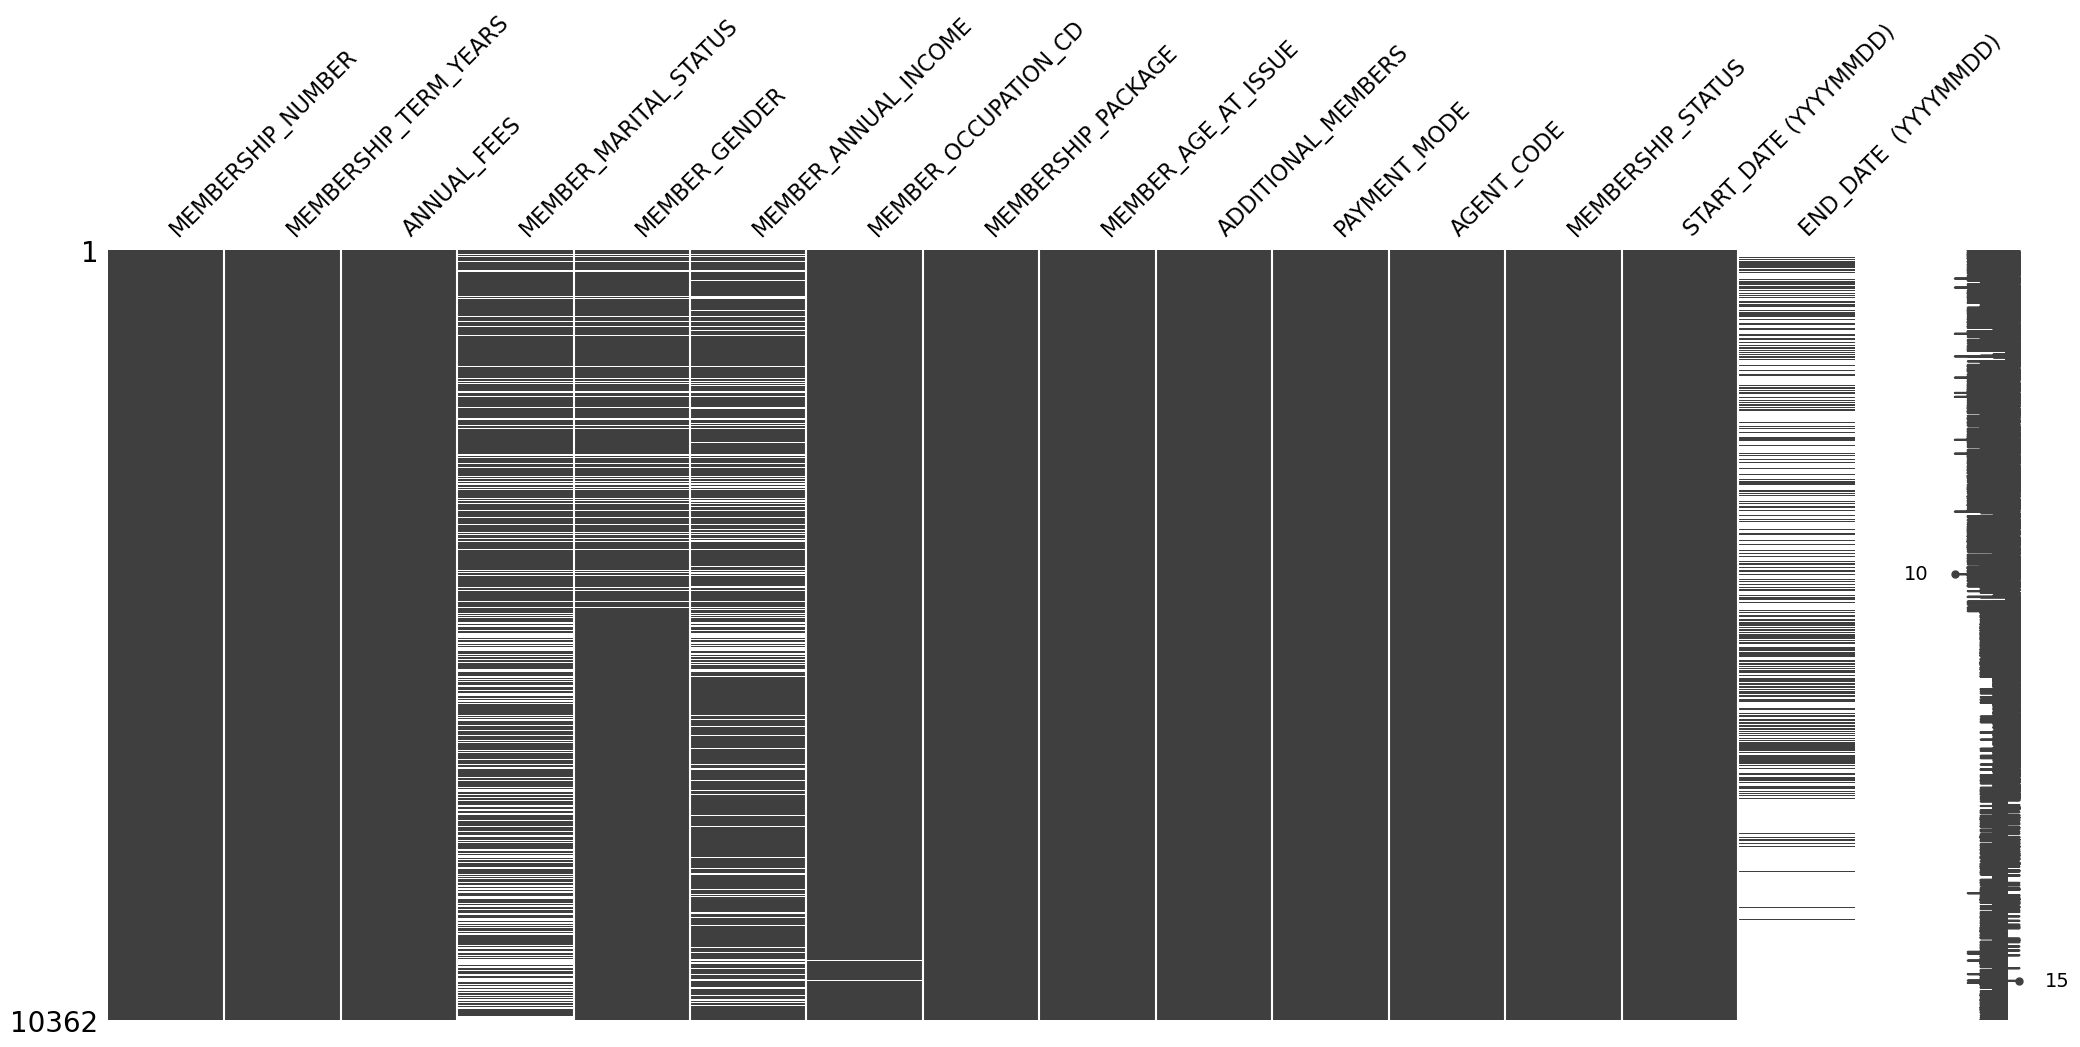

In [9]:
msno.matrix(df)#visualization missing data

In [10]:
# USING THIS MATRIX WE CAN VERY QUICKLY FIND THE PATTERN OF MISSINGNESS IN THE DATASET

In [11]:
Numerical_columns = df.select_dtypes(include="number").columns.to_list()
Categorical_columns = df.select_dtypes(exclude="number").columns.to_list()

# list of categorical and numerical column

In [12]:
print(f"Numerical column in the data: {Numerical_columns}")

Numerical column in the data: ['MEMBERSHIP_TERM_YEARS', 'ANNUAL_FEES', 'MEMBER_ANNUAL_INCOME', 'MEMBER_OCCUPATION_CD', 'MEMBER_AGE_AT_ISSUE', 'ADDITIONAL_MEMBERS', 'START_DATE (YYYYMMDD)', 'END_DATE  (YYYYMMDD)']


In [13]:
print(f"Categorical column in the data: {Categorical_columns}")

Categorical column in the data: ['MEMBERSHIP_NUMBER', 'MEMBER_MARITAL_STATUS', 'MEMBER_GENDER', 'MEMBERSHIP_PACKAGE', 'PAYMENT_MODE', 'AGENT_CODE', 'MEMBERSHIP_STATUS']


In [14]:
df.isnull().any()               #checking for missing values

MEMBERSHIP_NUMBER        False
MEMBERSHIP_TERM_YEARS    False
ANNUAL_FEES              False
MEMBER_MARITAL_STATUS     True
MEMBER_GENDER             True
MEMBER_ANNUAL_INCOME      True
MEMBER_OCCUPATION_CD      True
MEMBERSHIP_PACKAGE       False
MEMBER_AGE_AT_ISSUE      False
ADDITIONAL_MEMBERS       False
PAYMENT_MODE             False
AGENT_CODE               False
MEMBERSHIP_STATUS        False
START_DATE (YYYYMMDD)    False
END_DATE  (YYYYMMDD)      True
dtype: bool

In [15]:
#handling missing numerical data
df['MEMBER_ANNUAL_INCOME'] = df['MEMBER_ANNUAL_INCOME'].fillna(df['MEMBER_ANNUAL_INCOME'].mean())

In [16]:
df['MEMBER_OCCUPATION_CD'] = df['MEMBER_OCCUPATION_CD'].fillna(df['MEMBER_OCCUPATION_CD'].mean())

In [17]:
df['END_DATE  (YYYYMMDD)'] = df['END_DATE  (YYYYMMDD)'].fillna(df['END_DATE  (YYYYMMDD)'].mean())

In [18]:
df.isnull().sum()

MEMBERSHIP_NUMBER           0
MEMBERSHIP_TERM_YEARS       0
ANNUAL_FEES                 0
MEMBER_MARITAL_STATUS    2597
MEMBER_GENDER             611
MEMBER_ANNUAL_INCOME        0
MEMBER_OCCUPATION_CD        0
MEMBERSHIP_PACKAGE          0
MEMBER_AGE_AT_ISSUE         0
ADDITIONAL_MEMBERS          0
PAYMENT_MODE                0
AGENT_CODE                  0
MEMBERSHIP_STATUS           0
START_DATE (YYYYMMDD)       0
END_DATE  (YYYYMMDD)        0
dtype: int64

In [19]:
#handling missing categorical data 
df['MEMBER_MARITAL_STATUS'].mode()[0]

'M'

In [20]:
df['MEMBER_MARITAL_STATUS'] = df['MEMBER_MARITAL_STATUS'].fillna(df['MEMBER_MARITAL_STATUS'].mode()[0])

In [21]:
df['MEMBER_GENDER'].mode([0])

0    M
Name: MEMBER_GENDER, dtype: object

In [22]:
df['MEMBER_GENDER'] = df['MEMBER_GENDER'].fillna(df['MEMBER_GENDER'].mode()[0])

In [23]:
df.isnull().sum()

MEMBERSHIP_NUMBER        0
MEMBERSHIP_TERM_YEARS    0
ANNUAL_FEES              0
MEMBER_MARITAL_STATUS    0
MEMBER_GENDER            0
MEMBER_ANNUAL_INCOME     0
MEMBER_OCCUPATION_CD     0
MEMBERSHIP_PACKAGE       0
MEMBER_AGE_AT_ISSUE      0
ADDITIONAL_MEMBERS       0
PAYMENT_MODE             0
AGENT_CODE               0
MEMBERSHIP_STATUS        0
START_DATE (YYYYMMDD)    0
END_DATE  (YYYYMMDD)     0
dtype: int64

In [24]:
df.MEMBER_GENDER.unique()

array(['M', 'F'], dtype=object)

<Axes: >

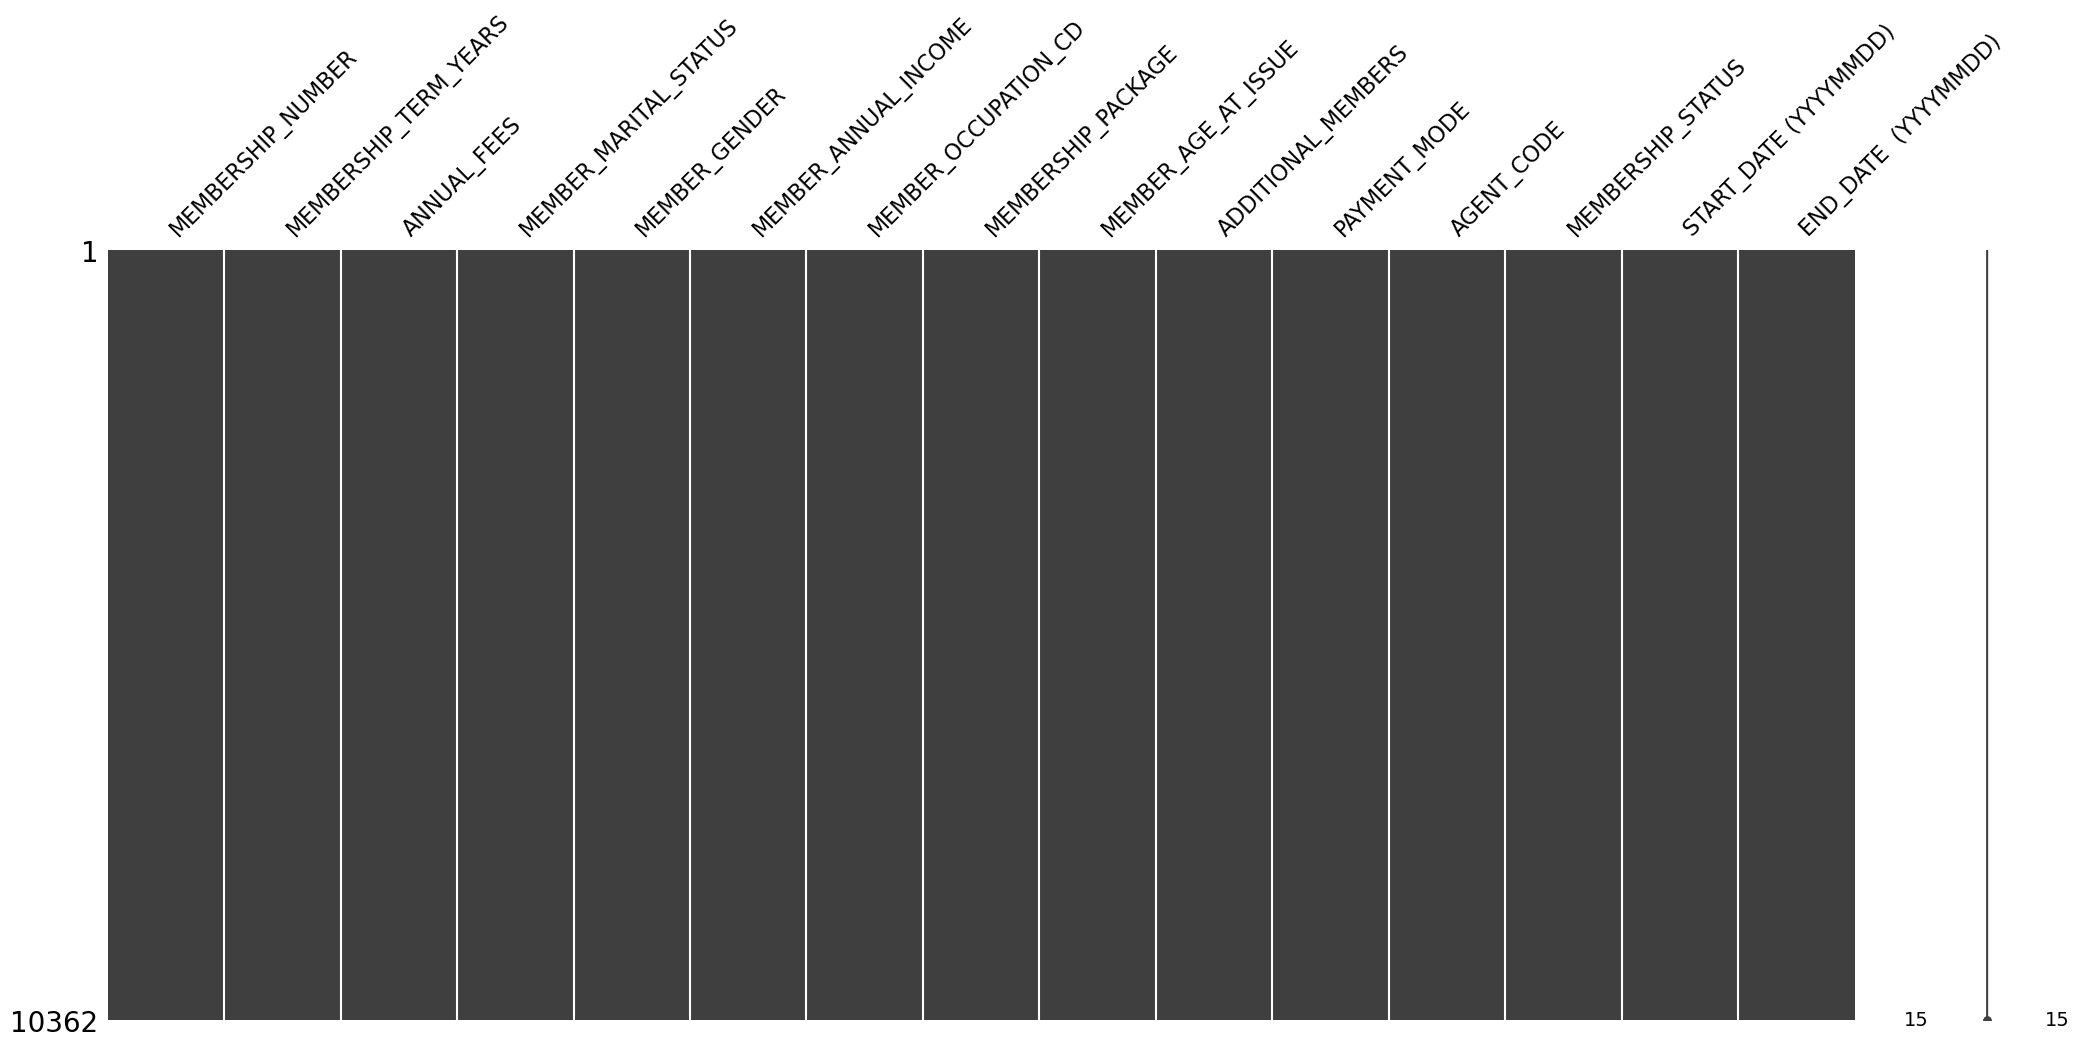

In [25]:
msno.matrix(df) #After preprocessing

# Data Visualization 

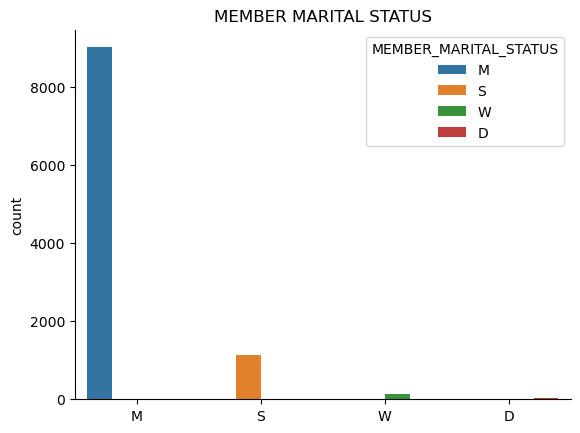

In [26]:
sns.countplot(x='MEMBER_MARITAL_STATUS',data=df, order=['M', 'S', 'W', 'D'],hue="MEMBER_MARITAL_STATUS")
plt.title("MEMBER MARITAL STATUS")
plt.xlabel("")
sns.despine()

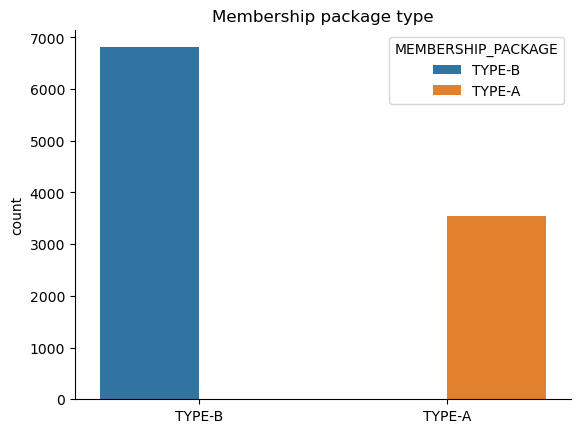

In [27]:
sns.countplot(x='MEMBERSHIP_PACKAGE',data=df,hue="MEMBERSHIP_PACKAGE")
plt.title("Membership package type")
plt.xlabel("")
sns.despine()

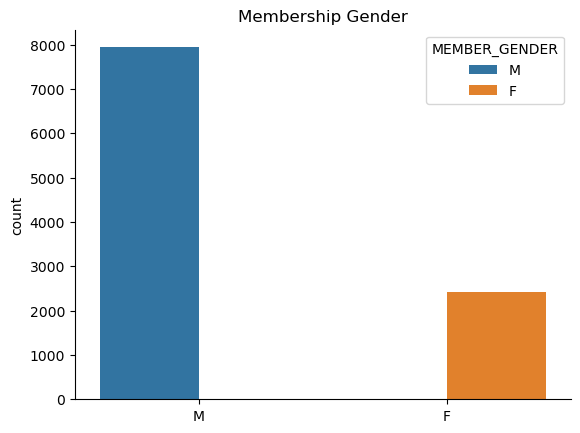

In [28]:
sns.countplot(x='MEMBER_GENDER',data=df,hue="MEMBER_GENDER")
plt.title("Membership Gender")
plt.xlabel("")
sns.despine()

Text(0.5, 1.0, 'Duration of Member Services')

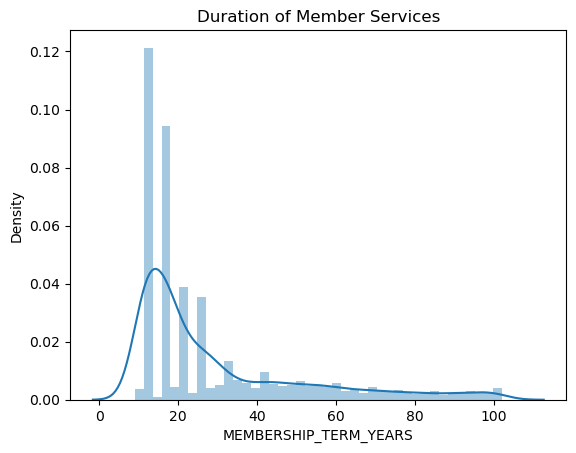

In [29]:
sns.distplot(df.MEMBERSHIP_TERM_YEARS)  
plt.title("Duration of Member Services")

Text(0.5, 0, '')

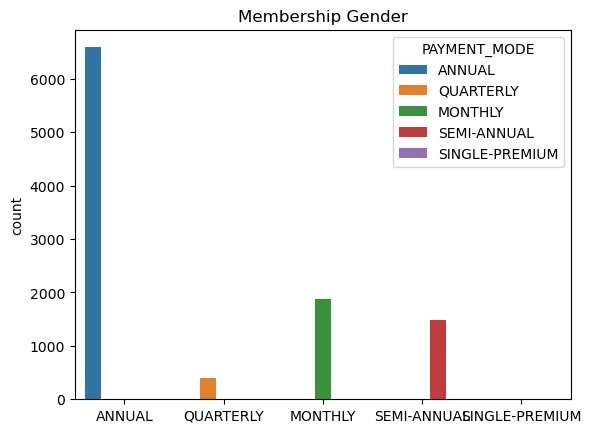

In [30]:
sns.countplot(x='PAYMENT_MODE',data=df,hue="PAYMENT_MODE")
plt.title("Membership Gender")
plt.xlabel("")

Text(0.5, 1.0, "MEMBER'S AGE")

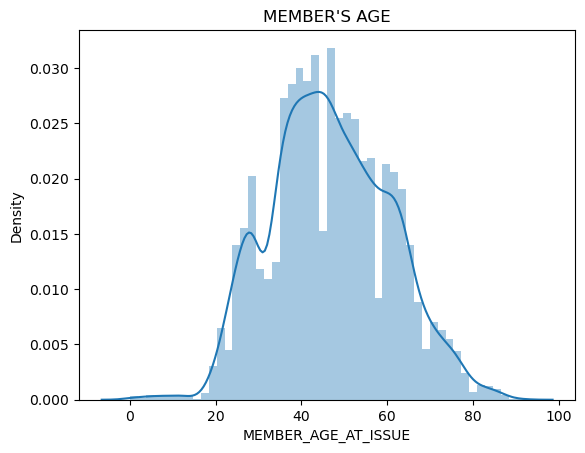

In [31]:
sns.distplot(df.MEMBER_AGE_AT_ISSUE)  
plt.title("MEMBER'S AGE")

Text(0.5, 1.0, 'ANNUAL_FEES vs ADDITIONAL_MEMBERS')

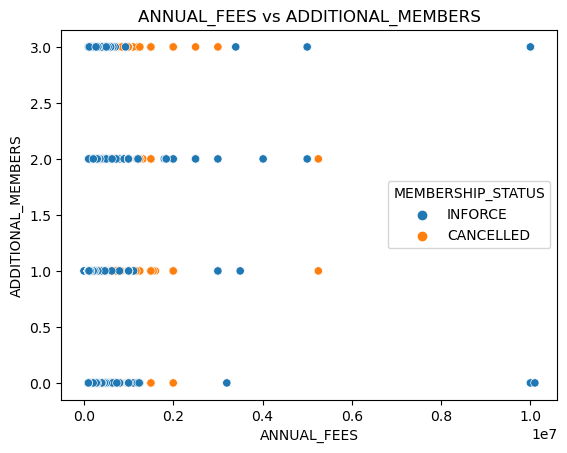

In [32]:
sns.scatterplot(x="ANNUAL_FEES", y="ADDITIONAL_MEMBERS", hue="MEMBERSHIP_STATUS", data=df)
plt.title("ANNUAL_FEES vs ADDITIONAL_MEMBERS")

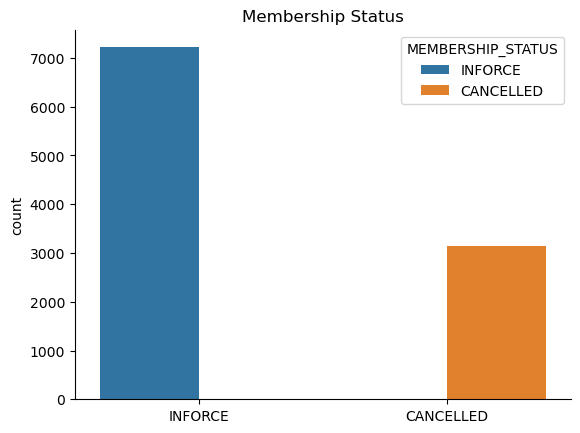

In [33]:
sns.countplot(x='MEMBERSHIP_STATUS',data=df,hue="MEMBERSHIP_STATUS")
plt.title("Membership Status")
plt.xlabel("")
sns.despine()

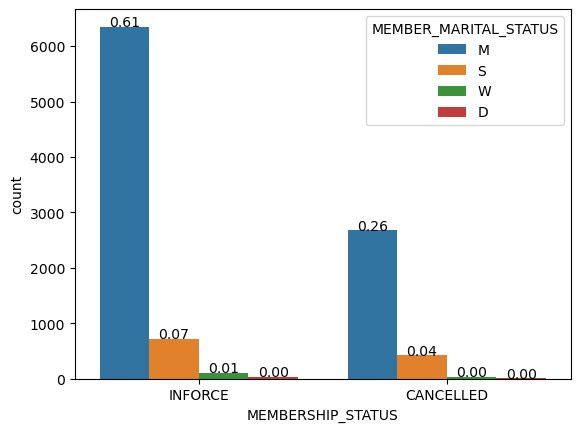

In [34]:
from matplotlib.pyplot import show
ax = sns.countplot(x="MEMBERSHIP_STATUS", hue="MEMBER_MARITAL_STATUS", data=df)
total = float(len(df)) # one person per row 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 

**INSIGHT** : Married people cancelled more

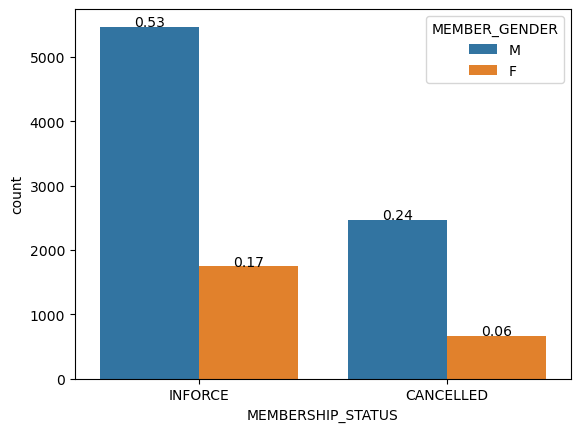

In [35]:
from matplotlib.pyplot import show
ax = sns.countplot(x="MEMBERSHIP_STATUS", hue="MEMBER_GENDER", data=df)
total = float(len(df)) # one person per row 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
show()

**INSIGHT** : Male cancelled more

## Data Cleaning

In [36]:
cols = ['MEMBERSHIP_NUMBER','AGENT_CODE', 'START_DATE (YYYYMMDD)', 'END_DATE  (YYYYMMDD)'] # remove unwanted feature

In [37]:
df = df.drop(columns=cols, axis=1)

## Handling Categorical Data

In [38]:
df.MEMBER_MARITAL_STATUS.value_counts()

MEMBER_MARITAL_STATUS
M    9027
S    1144
W     146
D      45
Name: count, dtype: int64

In [39]:
df.MEMBER_GENDER.value_counts()

MEMBER_GENDER
M    7941
F    2421
Name: count, dtype: int64

In [40]:
df.MEMBER_MARITAL_STATUS.unique()

array(['M', 'S', 'W', 'D'], dtype=object)

In [41]:
dataMapping={
    "M" : 1,
    "S" : 2,
    "W" : 3,
    "D" : 4
}

In [42]:
df['MEMBER_MARITAL_STATUS']=df['MEMBER_MARITAL_STATUS'].map(dataMapping)

In [43]:
df

,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,PAYMENT_MODE,MEMBERSHIP_STATUS
0,29,113125.00,1,M,2.520000e+07,1.0,TYPE-B,45,2,ANNUAL,INFORCE
1,38,112220.00,1,M,1.033920e+07,1.0,TYPE-B,36,3,QUARTERLY,INFORCE
2,12,100000.00,1,M,1.440000e+07,1.0,TYPE-B,42,1,ANNUAL,INFORCE
3,12,100000.00,1,M,9.000000e+06,1.0,TYPE-B,39,2,ANNUAL,INFORCE
4,46,100000.00,1,M,4.800000e+06,1.0,TYPE-B,27,2,QUARTERLY,INFORCE
...,...,...,...,...,...,...,...,...,...,...,...
10357,17,206180.15,1,M,1.451100e+06,6.0,TYPE-A,71,0,ANNUAL,INFORCE
10358,22,100000.42,1,F,3.999960e+05,2.0,TYPE-A,63,0,ANNUAL,INFORCE
10359,17,270950.45,1,M,1.451100e+06,6.0,TYPE-A,62,3,ANNUAL,INFORCE
10360,57,210006.61,1,M,1.451100e+06,6.0,TYPE-A,72,2,ANNUAL,INFORCE


In [44]:
df.MEMBER_GENDER.unique()

array(['M', 'F'], dtype=object)

In [45]:
dataMapping={
    "M" : 1,
    "F" : 0
}

In [46]:
df['MEMBER_GENDER']=df['MEMBER_GENDER'].map(dataMapping)

In [47]:
df

,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,PAYMENT_MODE,MEMBERSHIP_STATUS
0,29,113125.00,1,1,2.520000e+07,1.0,TYPE-B,45,2,ANNUAL,INFORCE
1,38,112220.00,1,1,1.033920e+07,1.0,TYPE-B,36,3,QUARTERLY,INFORCE
2,12,100000.00,1,1,1.440000e+07,1.0,TYPE-B,42,1,ANNUAL,INFORCE
3,12,100000.00,1,1,9.000000e+06,1.0,TYPE-B,39,2,ANNUAL,INFORCE
4,46,100000.00,1,1,4.800000e+06,1.0,TYPE-B,27,2,QUARTERLY,INFORCE
...,...,...,...,...,...,...,...,...,...,...,...
10357,17,206180.15,1,1,1.451100e+06,6.0,TYPE-A,71,0,ANNUAL,INFORCE
10358,22,100000.42,1,0,3.999960e+05,2.0,TYPE-A,63,0,ANNUAL,INFORCE
10359,17,270950.45,1,1,1.451100e+06,6.0,TYPE-A,62,3,ANNUAL,INFORCE
10360,57,210006.61,1,1,1.451100e+06,6.0,TYPE-A,72,2,ANNUAL,INFORCE


In [48]:
df.MEMBERSHIP_PACKAGE.unique()

array(['TYPE-B', 'TYPE-A'], dtype=object)

In [49]:
dataMapping={
    "TYPE-A" : 1,
    "TYPE-B" : 0
}

In [50]:
df['MEMBERSHIP_PACKAGE']=df['MEMBERSHIP_PACKAGE'].map(dataMapping)

In [51]:
df

,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,PAYMENT_MODE,MEMBERSHIP_STATUS
0,29,113125.00,1,1,2.520000e+07,1.0,0,45,2,ANNUAL,INFORCE
1,38,112220.00,1,1,1.033920e+07,1.0,0,36,3,QUARTERLY,INFORCE
2,12,100000.00,1,1,1.440000e+07,1.0,0,42,1,ANNUAL,INFORCE
3,12,100000.00,1,1,9.000000e+06,1.0,0,39,2,ANNUAL,INFORCE
4,46,100000.00,1,1,4.800000e+06,1.0,0,27,2,QUARTERLY,INFORCE
...,...,...,...,...,...,...,...,...,...,...,...
10357,17,206180.15,1,1,1.451100e+06,6.0,1,71,0,ANNUAL,INFORCE
10358,22,100000.42,1,0,3.999960e+05,2.0,1,63,0,ANNUAL,INFORCE
10359,17,270950.45,1,1,1.451100e+06,6.0,1,62,3,ANNUAL,INFORCE
10360,57,210006.61,1,1,1.451100e+06,6.0,1,72,2,ANNUAL,INFORCE


In [52]:
df.PAYMENT_MODE.unique()

array(['ANNUAL', 'QUARTERLY', 'MONTHLY', 'SEMI-ANNUAL', 'SINGLE-PREMIUM'],
      dtype=object)

In [53]:
dataMapping={
    "ANNUAL" : 5,
    "QUARTERLY" : 4,
    "MONTHLY" : 3,
    "SEMI-ANNUAL" : 2,
    'SINGLE-PREMIUM':1
}

In [54]:
df['PAYMENT_MODE']=df['PAYMENT_MODE'].map(dataMapping)

In [55]:
df


,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,PAYMENT_MODE,MEMBERSHIP_STATUS
0,29,113125.00,1,1,2.520000e+07,1.0,0,45,2,5,INFORCE
1,38,112220.00,1,1,1.033920e+07,1.0,0,36,3,4,INFORCE
2,12,100000.00,1,1,1.440000e+07,1.0,0,42,1,5,INFORCE
3,12,100000.00,1,1,9.000000e+06,1.0,0,39,2,5,INFORCE
4,46,100000.00,1,1,4.800000e+06,1.0,0,27,2,4,INFORCE
...,...,...,...,...,...,...,...,...,...,...,...
10357,17,206180.15,1,1,1.451100e+06,6.0,1,71,0,5,INFORCE
10358,22,100000.42,1,0,3.999960e+05,2.0,1,63,0,5,INFORCE
10359,17,270950.45,1,1,1.451100e+06,6.0,1,62,3,5,INFORCE
10360,57,210006.61,1,1,1.451100e+06,6.0,1,72,2,5,INFORCE


In [56]:
df.MEMBERSHIP_STATUS.unique()

array(['INFORCE', 'CANCELLED'], dtype=object)

In [57]:
dataMapping={
    "INFORCE" : 1,
    "CANCELLED" : 0
}

In [58]:
df['MEMBERSHIP_STATUS']=df['MEMBERSHIP_STATUS'].map(dataMapping)

In [59]:
df

,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,PAYMENT_MODE,MEMBERSHIP_STATUS
0,29,113125.00,1,1,2.520000e+07,1.0,0,45,2,5,1
1,38,112220.00,1,1,1.033920e+07,1.0,0,36,3,4,1
2,12,100000.00,1,1,1.440000e+07,1.0,0,42,1,5,1
3,12,100000.00,1,1,9.000000e+06,1.0,0,39,2,5,1
4,46,100000.00,1,1,4.800000e+06,1.0,0,27,2,4,1
...,...,...,...,...,...,...,...,...,...,...,...
10357,17,206180.15,1,1,1.451100e+06,6.0,1,71,0,5,1
10358,22,100000.42,1,0,3.999960e+05,2.0,1,63,0,5,1
10359,17,270950.45,1,1,1.451100e+06,6.0,1,62,3,5,1
10360,57,210006.61,1,1,1.451100e+06,6.0,1,72,2,5,1


# DATA SPLITTING


In [60]:
from sklearn.model_selection import train_test_split
X = df.drop('MEMBERSHIP_STATUS', axis=1)
y = df['MEMBERSHIP_STATUS']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=10)

In [62]:
len(X_train)

8289

In [63]:
len( X_test)

2073

# Correlation Matrix

In [64]:
cor = df.corr()

In [65]:
cor

,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,PAYMENT_MODE,MEMBERSHIP_STATUS
MEMBERSHIP_TERM_YEARS,1.000000,-0.003659,-0.042693,0.034579,0.025890,-0.002299,0.345622,-0.017322,-0.215914,0.061824,0.041998
ANNUAL_FEES,-0.003659,1.000000,-0.026122,0.013518,0.050685,-0.025145,-0.030947,0.021193,0.013278,0.022884,-0.028820
MEMBER_MARITAL_STATUS,-0.042693,-0.026122,1.000000,-0.102373,-0.009433,-0.047669,-0.064982,-0.251633,-0.437274,-0.022516,-0.020366
MEMBER_GENDER,0.034579,0.013518,-0.102373,1.000000,0.022413,-0.033552,-0.048946,-0.002262,0.019543,-0.018863,-0.031920
MEMBER_ANNUAL_INCOME,0.025890,0.050685,-0.009433,0.022413,1.000000,-0.003029,0.014411,-0.037537,0.003994,-0.012380,0.012934
MEMBER_OCCUPATION_CD,-0.002299,-0.025145,-0.047669,-0.033552,-0.003029,1.000000,0.147693,0.343225,-0.013316,0.011990,0.067146
MEMBERSHIP_PACKAGE,0.345622,-0.030947,-0.064982,-0.048946,0.014411,0.147693,1.000000,0.148601,-0.114488,-0.032979,0.215254
MEMBER_AGE_AT_ISSUE,-0.017322,0.021193,-0.251633,-0.002262,-0.037537,0.343225,0.148601,1.000000,0.060035,0.039805,0.091047
ADDITIONAL_MEMBERS,-0.215914,0.013278,-0.437274,0.019543,0.003994,-0.013316,-0.114488,0.060035,1.000000,-0.028450,0.018661
PAYMENT_MODE,0.061824,0.022884,-0.022516,-0.018863,-0.012380,0.011990,-0.032979,0.039805,-0.028450,1.000000,0.042815


<Axes: >

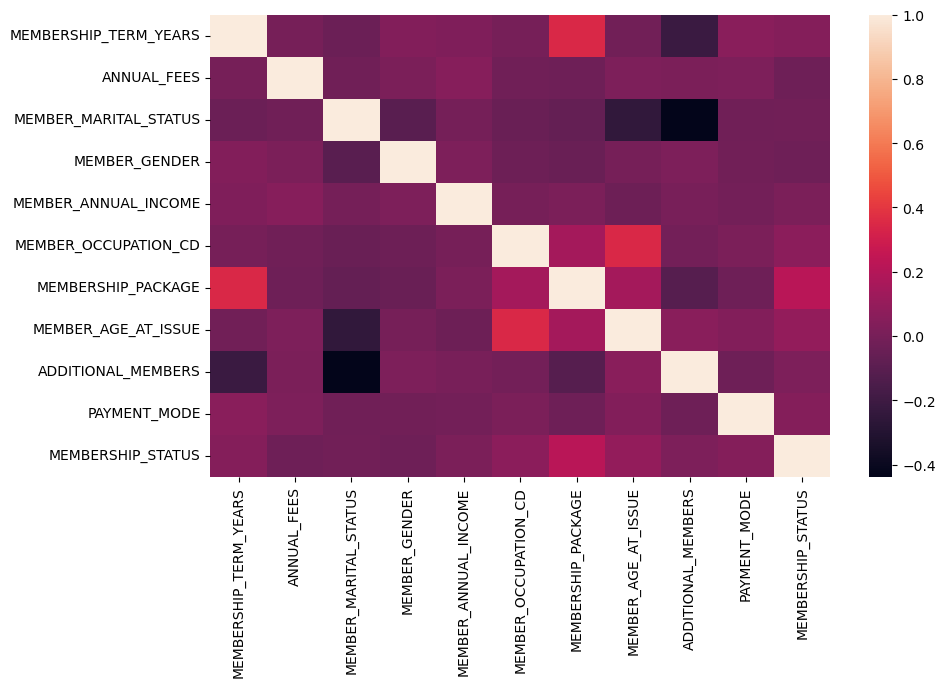

In [66]:
plt.figure(figsize=(10,6))
sns.heatmap(data = cor)

#  Model Fitting

## Random Forest Classifier

In [67]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier() 
rfc.fit(X_train, y_train)


RandomForestClassifier()

In [68]:
y_pred = rfc.predict(X_test)

In [69]:
print(" Accuracy is :",rfc.score(X_test, y_test)*100)

 Accuracy is : 69.85045827303425


## K-Nearest Neighbors

In [70]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [71]:
knn.score(X_test, y_test)*100

64.8818137964303

**INSIGHT**: Random Forest Classifier is more accurate than K-Nearest Neighbors.

# Classification Report 

In [72]:
from sklearn.metrics import classification_report,confusion_matrix 
report = classification_report(y_test,y_pred)

In [73]:
print(report)

              precision    recall  f1-score   support

           0       0.50      0.34      0.41       626
           1       0.75      0.85      0.80      1447

    accuracy                           0.70      2073
   macro avg       0.63      0.60      0.60      2073
weighted avg       0.67      0.70      0.68      2073



# Confusion Matrix  

In [74]:
confusion_matrix_df=confusion_matrix(y_test,y_pred)

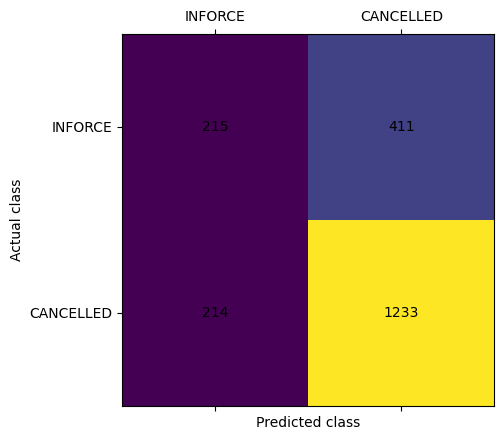

In [75]:
plt.matshow(confusion_matrix(y_test,y_pred))

plt.xlabel("Predicted class")
plt.ylabel("Actual class")
for i in range(2):
    for j in range(2):
        plt.text(j,i,confusion_matrix_df[i,j],ha="center",va="center")
        
plt.xticks([0,1],['INFORCE', 'CANCELLED'])
plt.yticks([0,1],['INFORCE', 'CANCELLED'])
plt.show()

# SOLUTION:


## Analysis and Insights:

1. **Income Segmentation:**

   - **Insight:** There is a need to revisit the pricing strategy based on income levels. Analyzing the data reveals that customers with lower income levels tend to cancel their memberships more frequently. Consider customizing package prices or introducing special offers for customers with lower income to improve retention.

2. **Promotional Offers for Annual Packages:**

   - **Insight:** Customers who have opted for monthly packages are more likely to cancel compared to those who have chosen annual packages. Implementing promotions or discounts for customers who switch to an annual subscription could be an effective strategy to increase customer retention.
   

3. **Age Group Satisfaction Survey:**

   - **Insight:** Conducting a satisfaction survey focused on customers aged 30 to 50 years might provide valuable insights. This age group appears to have a higher cancellation rate, and understanding their specific grievances or expectations could help in addressing issues and improving overall satisfaction.
   

4. **Customer Service Agent Performance:**

   - **Insight:** Analyzing the performance of customer service agents reveals that certain agents may be associated with a higher number of cancellations. Investigate the service provided by these agents, identify potential issues, and provide additional training or support to improve customer satisfaction and retention.
   

5. **Communication Strategy:**

   - **Insight:** Evaluate the effectiveness of communication strategies, especially for customers who have been members for a longer duration. It appears that some long-term members are canceling their memberships, indicating a potential dissatisfaction with the current offerings. Implement targeted communication to understand their needs and preferences.

6. **Feedback Mechanism:**

   - **Insight:** Implement a systematic feedback mechanism for members who cancel their subscriptions. Understanding the specific reasons for cancellation can provide valuable insights into areas that need improvement. This feedback can guide the development of strategies to address common concerns and enhance overall customer experience.


By implementing these insights, the premium club can adopt a proactive approach to retain customers, tailor services based on customer segments, and enhance overall customer satisfaction.